In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate, StratifiedShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mp
mp.rcParams['savefig.dpi'] = 1200
mp.rcParams["figure.dpi"] = 100

>> **1. UŽDUOTIS**
>>
>> [Tekmės citometrija](http://www.esparama.lt/es_parama_pletra/failai/ESFproduktai/2013_Tekmes_citometrija.pdf)([Flow cytometry](https://en.wikipedia.org/wiki/Flow_cytometry)) tai analizinės citologijos tyrimo metodas,  ląstelių  tyrimui  naudojantis  laminariojo  skysčio  tekėjimo,  šviesos  optinės  sklaidos, imunoglobulinų biologijos bei fluorescencinių medžiagų chemijos principus. Kad tėkmės kameros tyrimo taške vyktų dalelių matavimas, citometruose įrengiamas  šviesos  šaltinis  (lazeriai,  UV  lempa),  kurio  spindulį  kerta  vorele  išrikiuotos  dalelės. Dalelės, priklausomai nuo jų dydžio, paviršiaus ir vidaus struktūrų sudėtingumo, šviesos spindulį išsklaido į skirtingas puses. Išskaidytą spindulio šviesą surenka ir jo stiprumą užfiksuoja priekinės šviesos sklaidos (PŠS – atspindi dalelės dydį) ir šoninės 90° kampo šviesos sklaidos (ŠŠS – fiksuoja dalelės struktūrų sudėtingumą) detektoriai, kurie paverčia šviesinį signalą elektroniniu. Išspinduliuotą fluorescencinę  šviesą  fiksuoja  šoninės  fluorescencinės  šviesos  sklaidos  (FL)  detektoriai.
>>
>> ![flowcyt](./Cytometer.png)
>>
>> Fiksuoti duomenys pateikti cyto.csv faile
>>
>> FSCH/SSCH - šviesos sklaidos matavimai. Šie parametrai atspindi ląstelės dydį (priekinės šviesos sklaida - FSCH) ir dalelės struktūrų sudėtingumą (šoninės šviesos sklaida - SSCH)
>>
>> FL1_H ... fluorescensijos parametrai.
>>
>> Gate - žymuo suteiktas tyrėjo kiekvienai ląstelei.
>> Du žymenys suteikti ląstelėm 1 ir 2. Triukšmas pažymėtas -1.
>>
>> Užduotis:
>> - Automatizuokite žymenų suteikimą
>>
---

In [1]:
# 1 task
#
# Flow cytometry is an analytical cytology technique that uses the principles of laminar fluid flow, light optical scattering, 
# immunoglobulin biology and fluorescent chemistry to study cells. In order to measure the particles at the point of examination
# in the flow cell, the cytometers are equipped with a light source (lasers, UV lamp) whose beam is crossed by particles arranged in
# a line. The particles scatter the light beam in different directions depending on their size, surface and internal complexity. The
# scattered beam is collected and its intensity recorded by forward scattering (FBS - reflecting the size of the particle) and side
# scattering (SBS - recording the complexity of the particle's structures) detectors, which convert the light signal into an electronic
# signal. The emitted fluorescent light is detected by the lateral fluorescence light scattering (FL) detectors.
# Fixed data is provided in the cyto.csv file. FSCH/SSCH - light scattering measurements. These parameters reflect the size of the
# cell (forward light scattering - FSCH) and the complexity of the particle structures (side light scattering - SSCH). 
# FL1_H ... fluorescence parameters. Gate - the label given by the investigator to each cell. Two markers are given for
# cells 1 and 2. Noise is marked -1.
#
# 1. Automate the assignment of markers.


In [2]:
data = pd.read_csv('./cyto.csv')
data.head()

,FSC_H,SSC_H,FL1_H,FL2_H,FL3_H,FL1_A,FL1_W,Time,Gate
0,309,376,264,198,313,0,0,2,1
1,83,55,139,51,146,0,0,2,1
2,184,198,232,83,124,0,0,2,1
3,169,75,696,22,193,121,26,2,2
4,212,98,166,0,221,0,0,2,1


Clean data

In [3]:
data=data.drop('Time',axis=1) # drop unused time axis
data=data[data['Gate']!=-1] # drop labeled data as noise
data.head()

,FSC_H,SSC_H,FL1_H,FL2_H,FL3_H,FL1_A,FL1_W,Gate
0,309,376,264,198,313,0,0,1
1,83,55,139,51,146,0,0,1
2,184,198,232,83,124,0,0,1
3,169,75,696,22,193,121,26,2
4,212,98,166,0,221,0,0,1


Missing values

In [4]:
data.isnull().sum()

FSC_H    0
SSC_H    0
FL1_H    0
FL2_H    0
FL3_H    0
FL1_A    0
FL1_W    0
Gate     0
dtype: int64

In [5]:
data.Gate.value_counts()

1    1080
2     294
Name: Gate, dtype: int64

Padalinam į dalis

In [6]:
from sklearn.model_selection import train_test_split
X = data.drop('Gate',axis=1)
y = data['Gate']
y = y-1 # kad 0 ir 1 vietoje 1 ir 2
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2, stratify=y)

In [7]:
y_test.value_counts()

0    216
1     59
Name: Gate, dtype: int64

In [8]:
y_train.value_counts()

0    864
1    235
Name: Gate, dtype: int64

Explore data

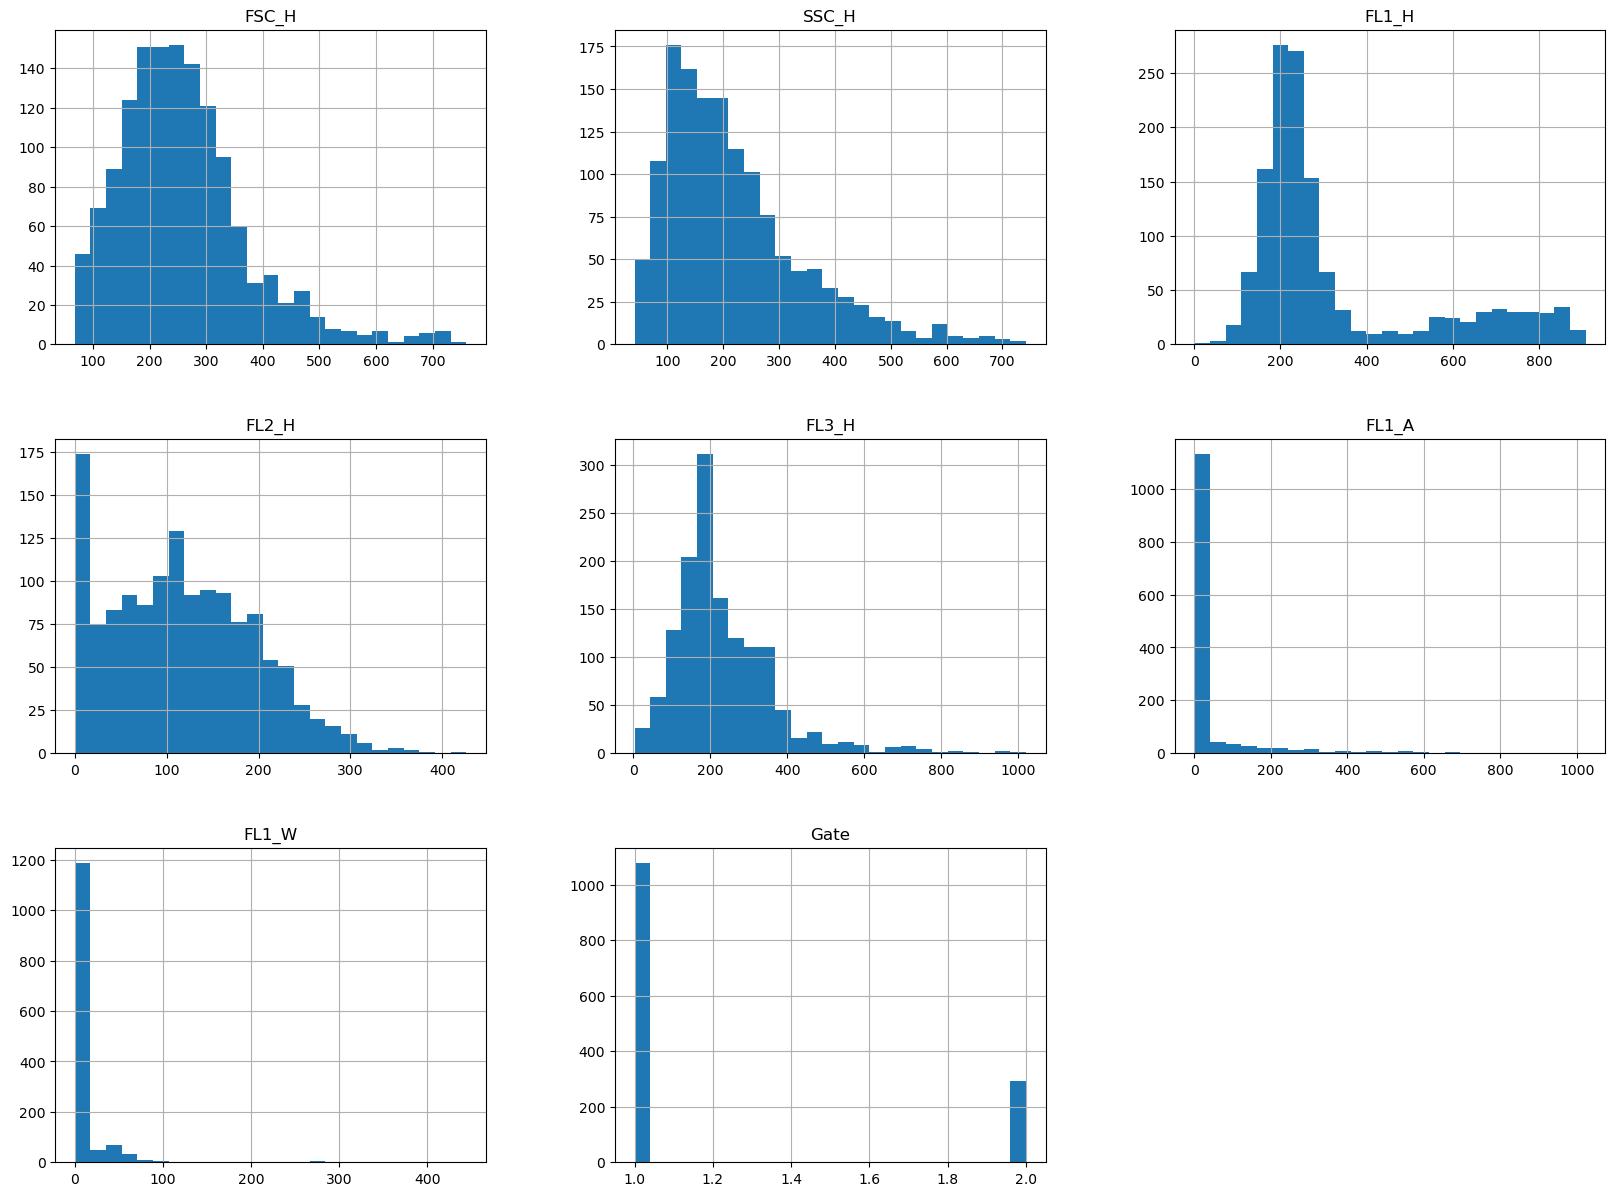

In [9]:
data.hist(bins=25, figsize=(20,15));

Explore how gate separates data

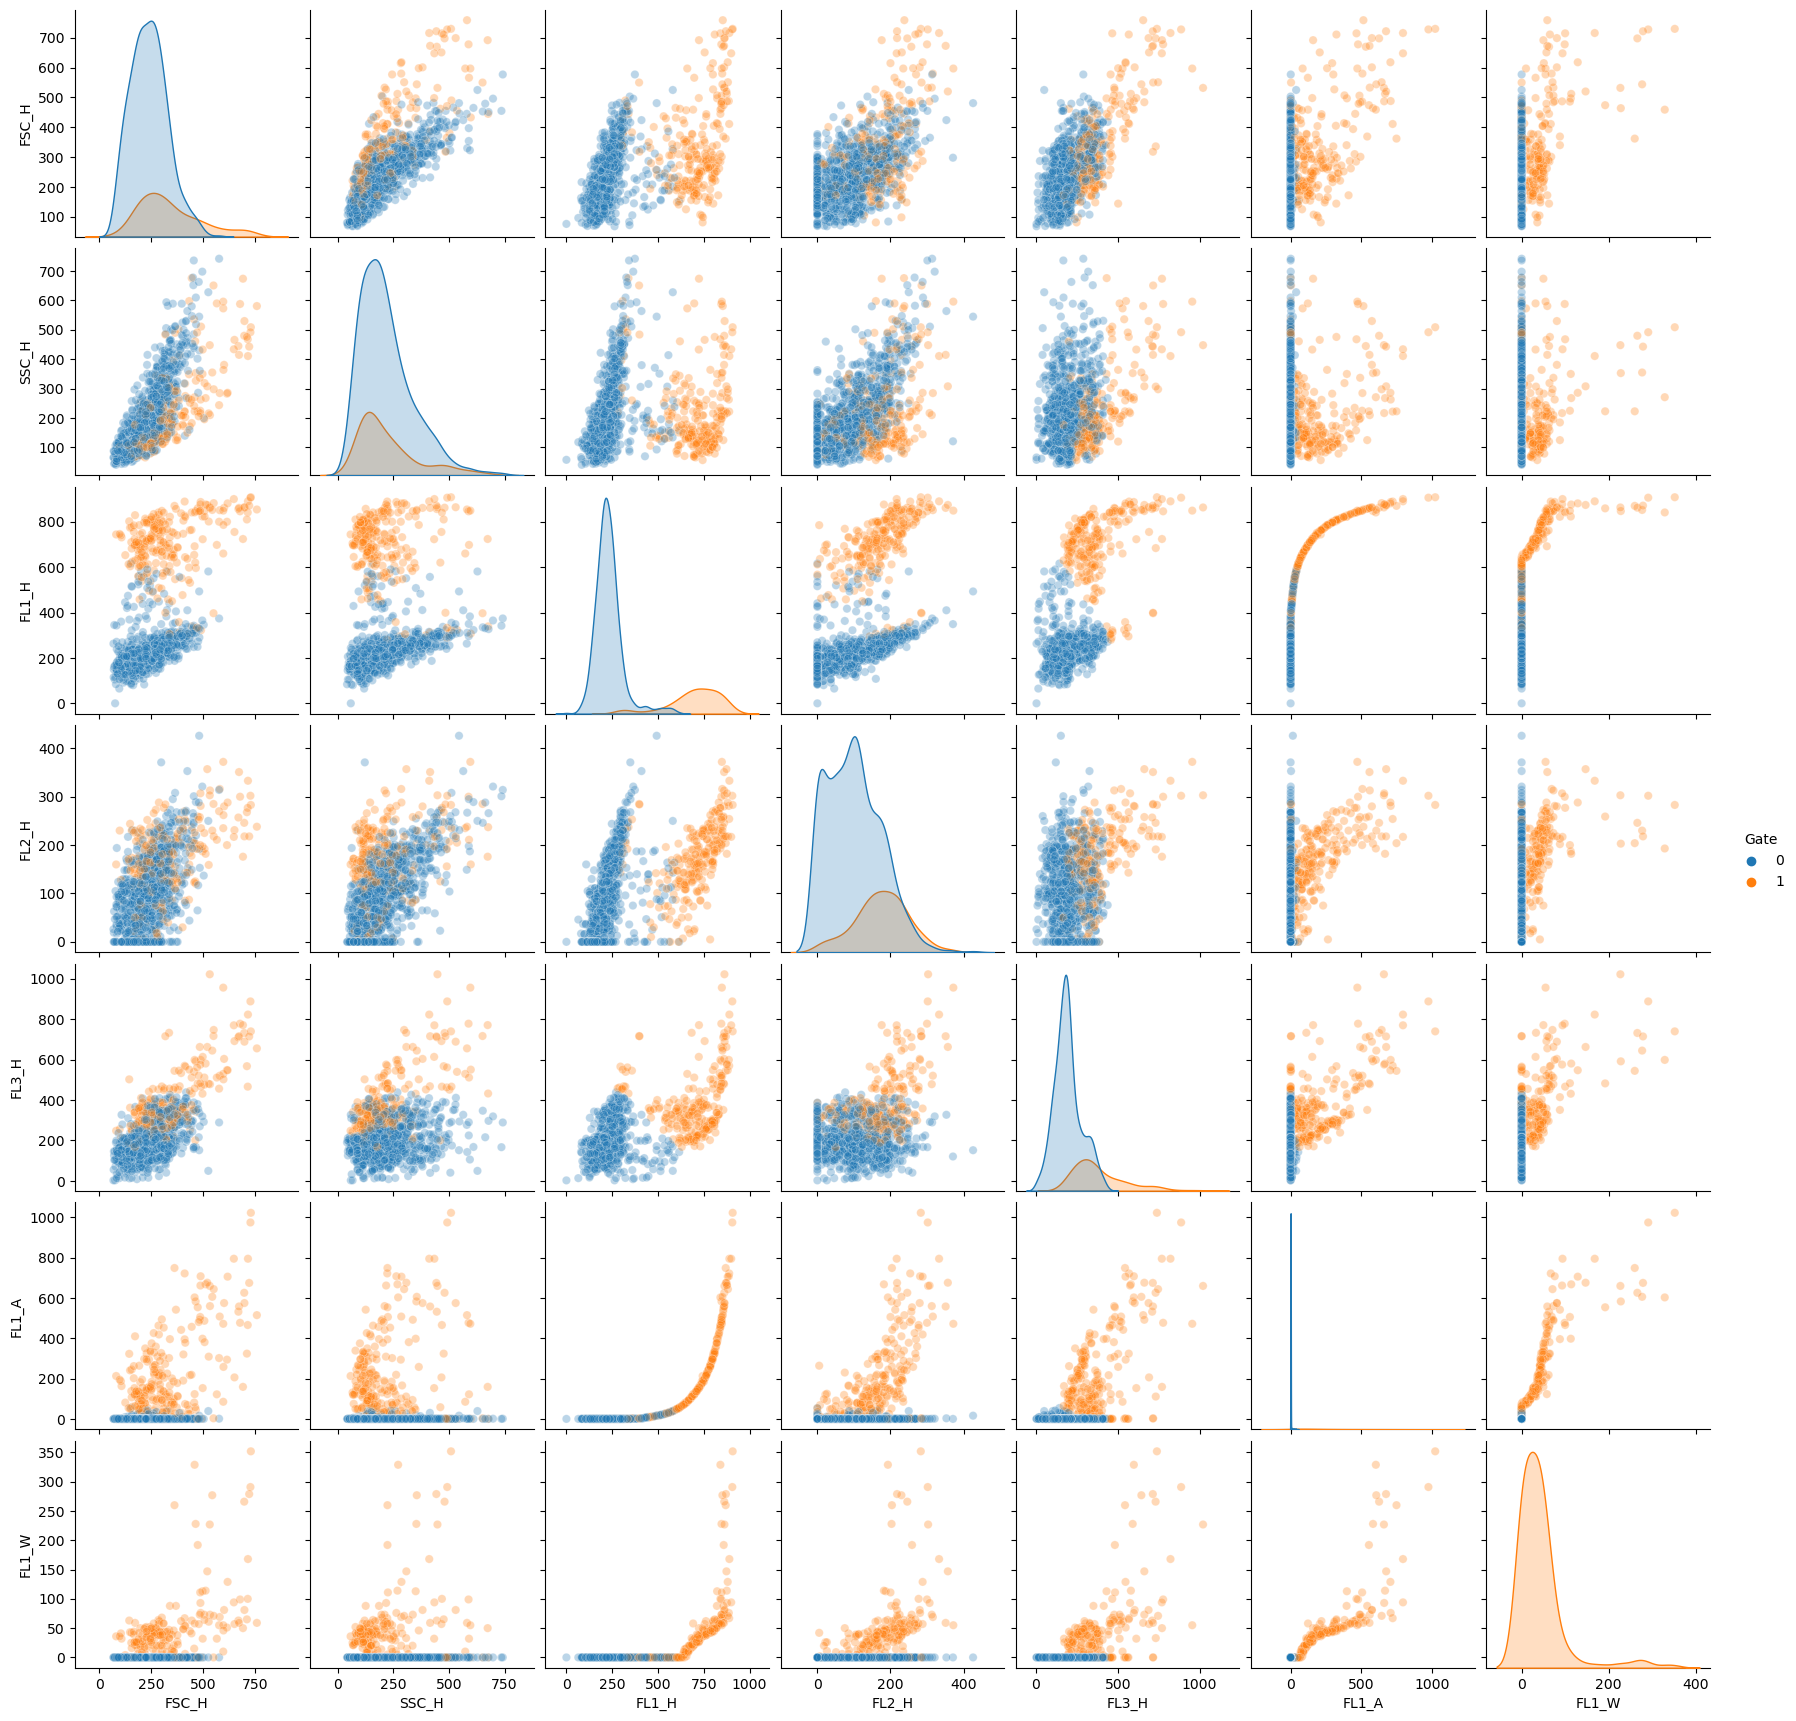

In [10]:
ax = sns.pairplot(pd.concat([X_train , y_train], axis = 1),hue='Gate',plot_kws={'alpha': 0.3});

FL1H ir FL1A padalina duomenis į dalis

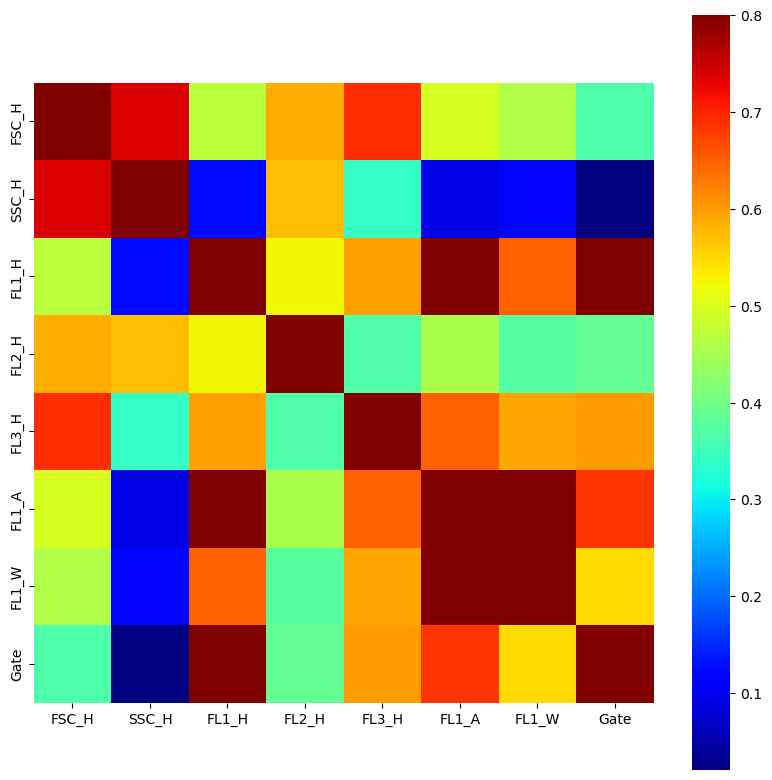

In [11]:
corrmat = pd.concat([X_train , y_train], axis = 1).corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True,cmap='jet');

In [12]:
yp0 = y_test[X_test['FL1_A']==0]
yp1 = y_test[X_test['FL1_A']>0]
(len(yp0)-sum(yp0)+sum(yp1.values))/len(y_test) 

0.9563636363636364

In [13]:
yp0 = y_test[X_test['FL1_H']<500]
yp1 = y_test[X_test['FL1_H']>500]
(len(yp0)-sum(yp0)+sum(yp1.values))/len(y_test)

0.9709090909090909

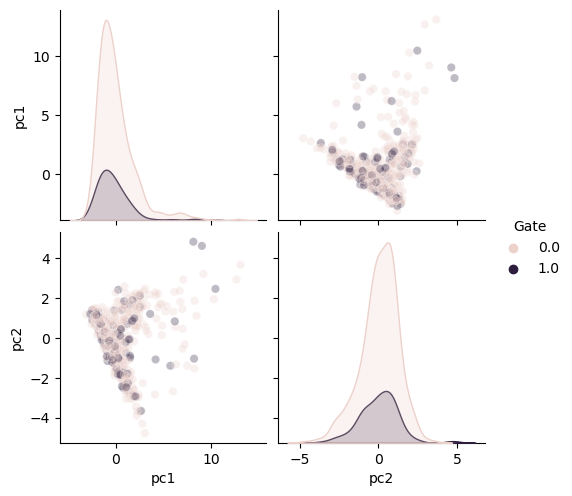

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std= scaler.fit_transform(X_train)
pca = PCA(2)
Xpca = pca.fit_transform(X_train_std)
dfpca= pd.DataFrame(data = Xpca , columns = ['pc1', 'pc2'])
df= pd.concat([dfpca, y_train], axis = 1)
ax=sns.pairplot(df,hue='Gate',plot_kws={'alpha': 0.3},vars=['pc1','pc2'])

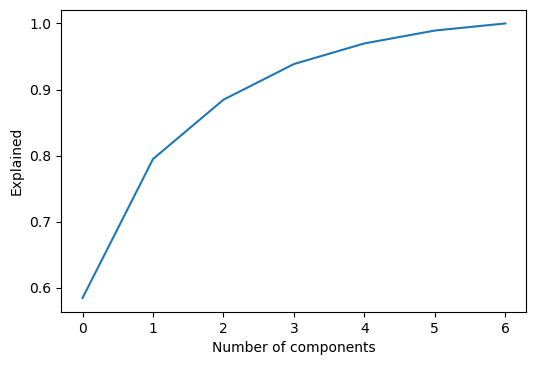

In [15]:
pca = PCA()
pca.fit_transform(X_train_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained');

K-means

In [16]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [17]:
Kmean = KMeans(n_clusters=2)
Kmean.fit(X_train)
y_pred = Kmean.predict(X_test)
metrics.adjusted_rand_score(y_test, y_pred)

0.870068270176158

Classifiers

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
knn=KNeighborsClassifier()
grid_search=GridSearchCV(knn,param_grid,cv=5,scoring='accuracy',return_train_score=True)
grid_search.fit(X_train ,y_train);
c=grid_search.cv_results_
for mean_score,params in zip(c['mean_test_score'],c['params']):
    print (round(mean_score,5),params)

0.98726 {'n_neighbors': 1}
0.98453 {'n_neighbors': 2}
0.98635 {'n_neighbors': 3}
0.98907 {'n_neighbors': 4}
0.99271 {'n_neighbors': 5}
0.98907 {'n_neighbors': 6}
0.9909 {'n_neighbors': 7}
0.98634 {'n_neighbors': 8}
0.98817 {'n_neighbors': 9}
0.98907 {'n_neighbors': 10}


In [19]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_pred= model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9890909090909091

Deep networks

In [21]:
from keras import layers, models
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(7,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


2022-05-30 23:56:50.739308: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-05-30 23:56:50.740207: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-30 23:56:50.741293: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [22]:
model.fit(X_train, y_train, epochs=100, batch_size=10,verbose=0)
model.evaluate(X_test,y_test)

2022-05-30 23:56:50.932515: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-05-30 23:56:50.953902: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3393745000 Hz


9/9 [==============================] - 0s 5ms/step - loss: 0.0906 - accuracy: 0.9855


[0.09055876731872559, 0.9854545593261719]

---
>> **2. UŽDUOTIS**
>>
>> Užfiksuoti trijų rūšių augalų (specimen_id) lapų morfologijos parametrai (ll4,ll7,lv,s,t,ws,wv...ilgiai, pločiai - cm).
>> Parametrai fiksuoti apatinėje (v, abaksialinė) ir viršutinėje (d, adaksialinė) lapo dalyje, dviejose eksperimentinėse sąlygose (F ir H).
>> Duomenys: leaf_measures.csv.
>>
>> Užduotis:
>> - Sukurkite modelį rūšies atpažinimui iš morfologinių parametrų.
>>
---

In [2]:
# 2 task
#
# Leaf morphology parameters (ll4,ll7,lv,s,t,ws,wv...lengths, widths in cm) of three plant species (specimen_id) were recorded. 
# The parameters were recorded in the lower (v, abaxial) and upper (d, adaxial) part of the leaf in two experimental conditions 
# (F and H). Data: leaf_measures.csv.
#
# 1. Build a model for species recognition from morphological parameters.

In [23]:
df = pd.read_csv('./leaf_measures.csv',index_col=[0], header=[1,2,3])
specimen_id = df.iloc[:,-1].values
df=df.drop(df.columns[[-1]],axis=1)
df.index.name='subj_id'
df.columns.names =('condition','part','measure')
df.head()

condition         F                                                    \
part              d                                                     
measure         ll4       ll7        lv         s         t        ws   
subj_id                                                                 
0          0.155100  0.158400  0.174075  0.331812 -0.008783  0.231897   
1          0.158400  0.146025  0.155925  0.320926 -0.008809  0.223599   
2          0.146379  0.138109  0.161265  0.255564 -0.044308  0.217779   
3          0.165369  0.181158  0.170355  0.388909  0.047587  0.232971   
4          0.164573  0.160438  0.178632  0.270677 -0.016425  0.205577   

condition                                          ...         H            \
part                        v                      ...         d             
measure          wv       ll4       ll7        lv  ...         t        ws   
subj_id                                            ...                       
0          0.096525  0.151804  0.158260  0.126920  ...  0.006696  0.211084   
1          0.092400  0.142206  0.179196  0.116724  ... -0.001946  0.214116   
2          0.091797  0.141075  0.147675  0.123750  ... -0.037008  0.201173   
3          0.091410  0.163152  0.154912  0.128544  ...  0.058798  0.215898   
4          0.090143  0.150514  0.157130  0.124877  ... -0.003274  0.202416   

condition                                                              \
part                        v                                           
measure          wv       ll4       ll7        lv         s         t   
subj_id                                                                 
0          0.081810  0.131515  0.136050  0.108840  0.352842  0.059373   
1          0.081079  0.128169  0.132714  0.125442  0.329089  0.020825   
2          0.080432  0.118492  0.129220  0.123760  0.197941 -0.048958   
3          0.081346  0.138928  0.138928  0.123390  0.362848  0.056098   
4          0.075030  0.133736  0.125492  0.124576  0.250083 -0.017778   

condition                      
part                           
measure          ws        wv  
subj_id                        
0          0.211526  0.067118  
1          0.213942  0.060903  
2          0.200799  0.060970  
3          0.218454  0.067636  
4          0.198064  0.064120  

[5 rows x 28 columns]

In [24]:
corr_metrics = df.corr()
corr_metrics.style.background_gradient()

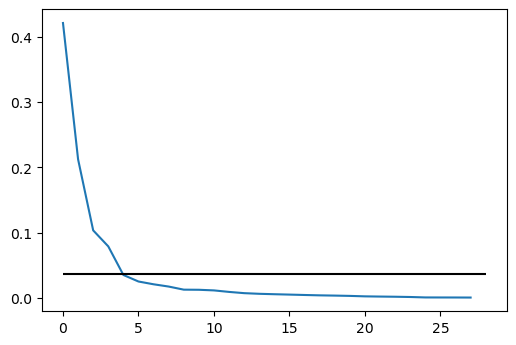

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca =PCA()
le = StandardScaler()
pca_data=pca.fit_transform(le.fit_transform(df.values))
plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.hlines(1/28,0,28,colors='k');

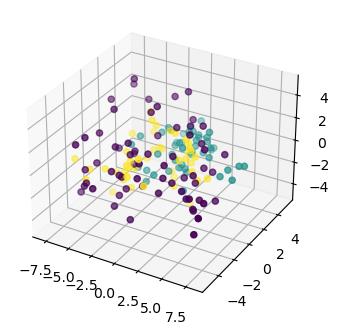

In [26]:
pca =PCA(n_components=3)
le = StandardScaler()
pca_data=pca.fit_transform(le.fit_transform(df.values))
df_pca=pd.DataFrame(pca_data)
df_pca['specimen']=specimen_id
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(pca_data[:,0],pca_data[:,1],pca_data[:,2],c=df_pca['specimen']);

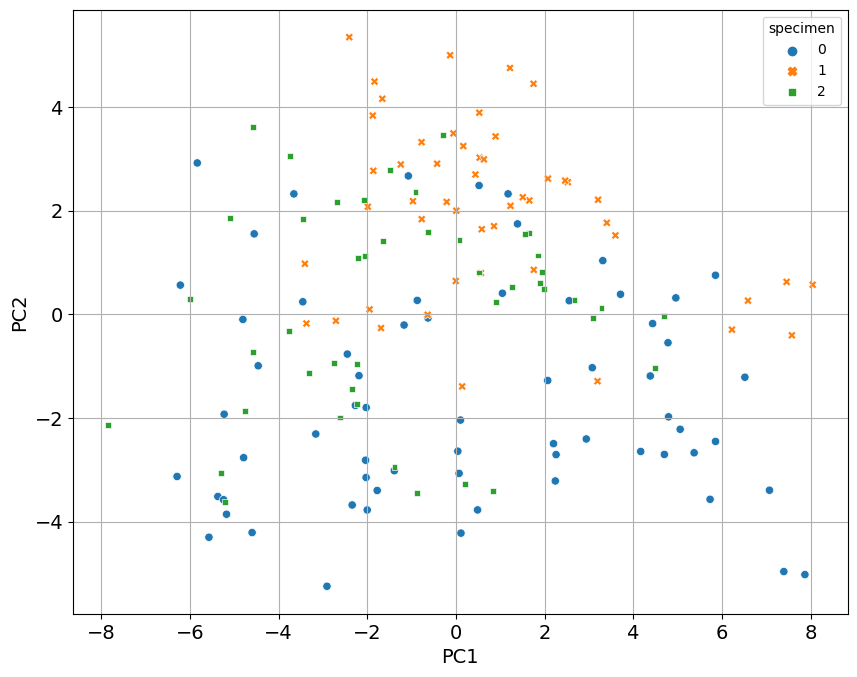

In [27]:
pca =PCA(n_components=2)
le = StandardScaler()
pca_data=pca.fit_transform(le.fit_transform(df.values))
df_pca=pd.DataFrame(pca_data)
df_pca['specimen']=specimen_id
plt.figure(figsize=(10,8), dpi=100)
sns.scatterplot(data=df_pca, x=0,y=1,hue='specimen',palette='tab10',style='specimen')
plt.xlabel("PC{}".format(1), size=14)
plt.ylabel("PC{}".format(2), size=14)
plt.grid()
plt.tick_params(axis='both', which='both', labelsize=14);

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(df, specimen_id, train_size=0.75, test_size=0.25, stratify=specimen_id,random_state=42)

In [29]:
x_train.head()

condition         F                                                    \
part              d                                                     
measure         ll4       ll7        lv         s         t        ws   
subj_id                                                                 
13         0.117493  0.130669  0.158148  0.251287  0.004331  0.210437   
158        0.154056  0.174230  0.189819  0.323004  0.052508  0.198991   
152        0.160160  0.170170  0.161070  0.235718 -0.033586  0.172396   
36         0.132342  0.136973  0.128687  0.215370 -0.016615  0.193382   
30         0.174144  0.175958  0.190470  0.387157  0.051496  0.277354   

condition                                          ...         H            \
part                        v                      ...         d             
measure          wv       ll4       ll7        lv  ...         t        ws   
subj_id                                            ...                       
13         0.080316  0.132825  0.131175  0.113850  ...  0.019138  0.184177   
158        0.088032  0.150562  0.141492  0.161046  ...  0.045208  0.173831   
152        0.068250  0.157430  0.159049  0.127598  ... -0.013562  0.139916   
36         0.075561  0.118656  0.123600  0.079104  ... -0.026857  0.175163   
30         0.080723  0.163440  0.164348  0.130752  ...  0.038939  0.230845   

condition                                                              \
part                        v                                           
measure          wv       ll4       ll7        lv         s         t   
subj_id                                                                 
13         0.065448  0.119734  0.118820  0.099626  0.258462  0.038721   
158        0.075530  0.131546  0.134721  0.138754  0.272156  0.046020   
152        0.054420  0.146934  0.146132  0.118576  0.224058 -0.000907   
36         0.065066  0.116352  0.108171  0.080901  0.221843  0.014412   
30         0.067266  0.152712  0.154530  0.109080  0.367996  0.070843   

condition                      
part                           
measure          ws        wv  
subj_id                        
13         0.183778  0.044786  
158        0.175704  0.049555  
152        0.143306  0.036291  
36         0.177257  0.050904  
30         0.236525  0.034542  

[5 rows x 28 columns]

In [30]:
y_train

array([0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 0,
       0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 2, 2, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 2, 2, 0, 1, 1, 1, 0, 2, 0, 1, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 2, 0, 2, 1, 1, 0, 1,
       2, 0, 0, 2, 2, 2, 1, 2, 0, 1, 0, 2, 2, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
knn=KNeighborsClassifier()
grid_search=GridSearchCV(knn,param_grid,cv=5,scoring='accuracy',return_train_score=True)
grid_search.fit(x_train.values ,y_train);
c=grid_search.cv_results_
for mean_score,params in zip(c['mean_test_score'],c['params']):
    print (round(mean_score,5),params)

0.73333 {'n_neighbors': 1}
0.76667 {'n_neighbors': 2}
0.75 {'n_neighbors': 3}
0.76667 {'n_neighbors': 4}
0.74167 {'n_neighbors': 5}
0.73333 {'n_neighbors': 6}
0.725 {'n_neighbors': 7}
0.75 {'n_neighbors': 8}
0.74167 {'n_neighbors': 9}
0.725 {'n_neighbors': 10}


In [32]:
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors=2)
model.fit(x_train.values,y_train)
y_pred= model.predict(x_test.values)
accuracy_score(y_test, y_pred)

0.725

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate=0.5, max_depth=10, max_features=0.6500000000000001, min_samples_leaf=11, min_samples_split=9, n_estimators=100, subsample=0.7000000000000001)

gbc.fit(x_train.values, y_train)
results = gbc.predict(x_test.values)
accuracy_score(results,y_test)

0.875

---
>> **3. UŽDUOTIS**
>>
>> 8 kanalų EEG užfiksuoti akių judesiai: viršun (up), žemyn (down), kairėn (left), dešinėn (right) trunkantys 2 sekundes nuo judesio instrukcijos pateikimo (0 ms - 2000 ms)
>>
>> Duomenys pateikti data.csv faile. Duomenims pritaikytas 1-40 Hz filtras.
>>
>> Stulpeliai:
>> - time: laikas ($ms$)
>> - condition: sąlyga (up, down, left, right)
>> - epoch: 2 sekundžių trukmės atkarpa, kiekvienam sąlygai po 210
>> - F3-O1: EEG duomenys iš skirtingų sensorių ($\mu V$)
>>
>>Užduotis:
>> - Padarykite klasifikatorių atskiriantį šias sąlygas

---

In [3]:
# 3 task
# 
# 8-channel EEG recorded eye movements: up, down, left, right, lasting 2 seconds after the movement instruction (0 ms - 2000 ms) 
# The data is provided in a data.csv file. A 1-40 Hz filter is applied to the data.
# Columns: 
#  time: time (m𝑠)
#  condition: condition (up, down, left, right)
#  epoch: 2-second segment, 210 for each condition
#  F3-O1: EEG data from different sensors (𝜇𝑉)
#
# 1. Make a classifier separating the following conditions

In [34]:
data = pd.read_csv('data.csv')
data.head()

,time,condition,epoch,F3,F4,C3,C4,P4,P3,O1,O2
0,0,up,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,4,up,0,0.054988,-0.026452,-0.024644,-0.131473,-0.095125,-0.133310,-0.359387,-0.032868
2,8,up,0,0.035626,-0.064786,-0.097859,-0.238527,-0.130246,-0.263087,-0.550563,-0.042836
3,12,up,0,-0.088558,-0.132608,-0.175963,-0.331529,-0.230509,-0.313267,-0.507399,-0.084937
4,16,up,0,-0.236318,-0.172976,-0.189875,-0.342200,-0.244033,-0.312718,-0.506881,-0.142237


In [35]:
df_grand_average = data.groupby(by=['condition','time']).mean().drop(columns='epoch')
df_grand_average

F3        F4        C3        C4        P4        P3  \
condition time                                                               
down      0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
          4     0.022331 -0.009300  0.000951 -0.001152 -0.011020 -0.014713   
          8     0.007485 -0.024200 -0.024331 -0.027224 -0.054062 -0.044111   
          12   -0.026147 -0.019536 -0.046071 -0.036080 -0.066301 -0.052432   
          16   -0.055068 -0.013606 -0.063899 -0.027450 -0.052452 -0.060139   
...                  ...       ...       ...       ...       ...       ...   
up        1984 -0.220346 -0.093320 -0.197557 -0.227426 -0.185652 -0.156105   
          1988 -0.217879 -0.116853 -0.201842 -0.247222 -0.193292 -0.153312   
          1992 -0.208261 -0.116757 -0.202524 -0.247212 -0.196310 -0.160373   
          1996 -0.230475 -0.098228 -0.207440 -0.231238 -0.195793 -0.176866   
          2000 -0.213525 -0.082680 -0.199337 -0.229728 -0.202771 -0.180175   

                      O1        O2  
condition time                      
down      0     0.000000  0.000000  
          4    -0.017131 -0.025578  
          8    -0.047071 -0.043011  
          12   -0.057701 -0.045870  
          16   -0.053997 -0.052424  
...                  ...       ...  
up        1984 -0.109119  0.070392  
          1988 -0.091297  0.055868  
          1992 -0.097988  0.039332  
          1996 -0.113613  0.046839  
          2000 -0.133790  0.050847  

[2004 rows x 8 columns]

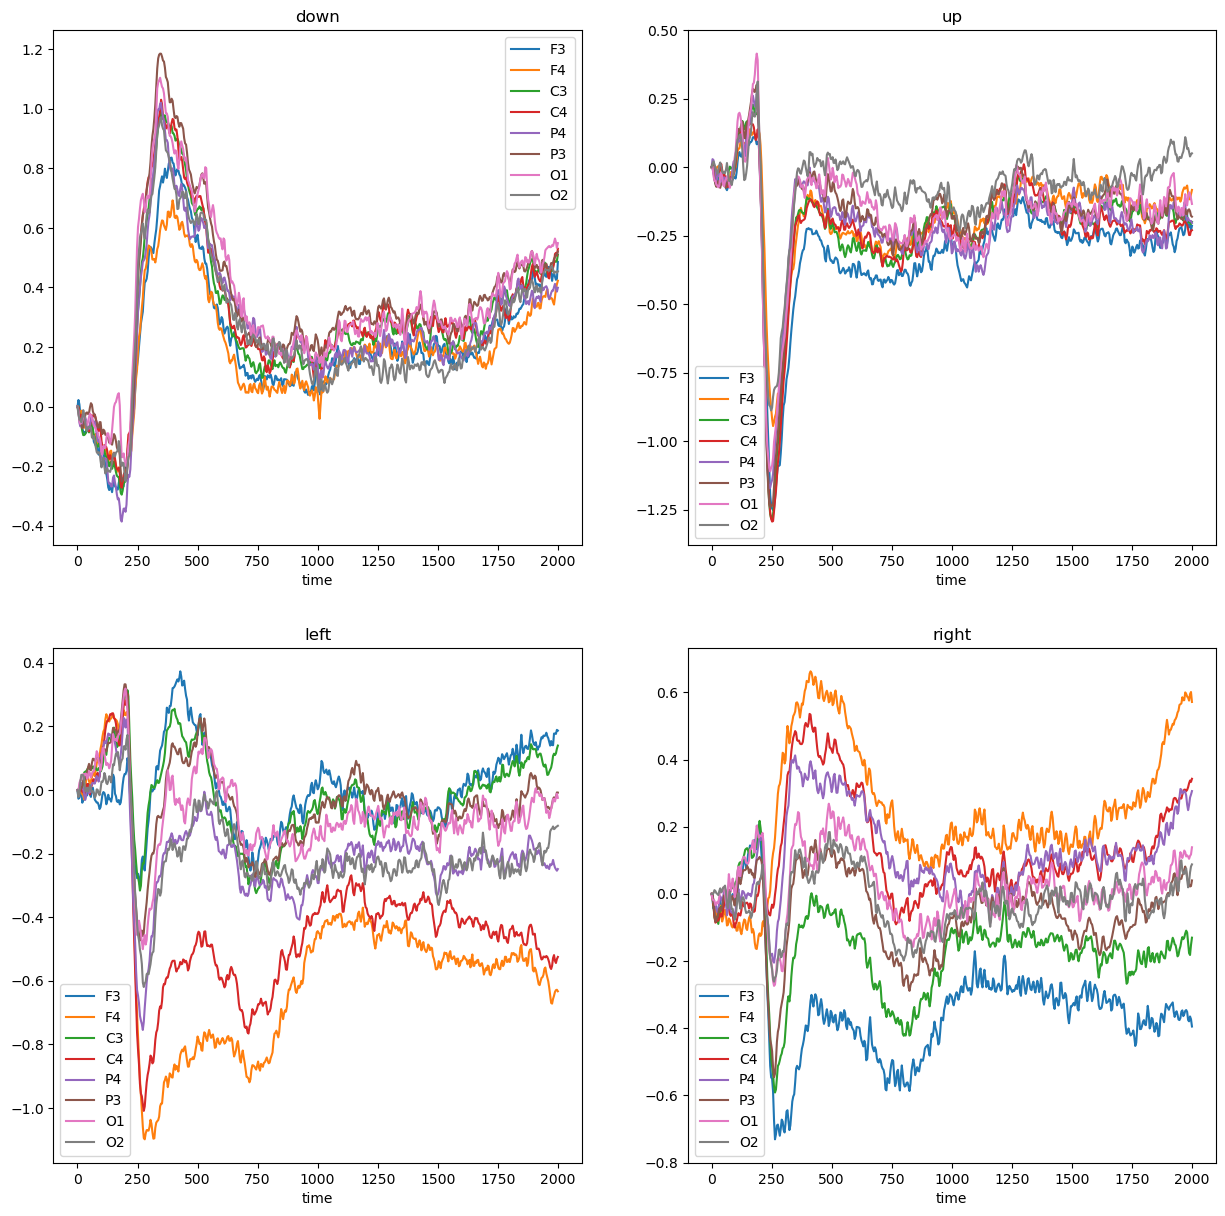

In [36]:
fig, ax = plt.subplots(2,2, figsize=(15,15))
df_grand_average.loc['down',:].plot(title='down', ax=ax[0][0])
df_grand_average.loc['up',:].plot(title='up',ax=ax[0][1])
df_grand_average.loc['left',:].plot(title='left',ax=ax[1][0])
df_grand_average.loc['right',:].plot(title='right',ax=ax[1][1]);

In [37]:
df = data.iloc[:,3:].values
epoch_nr = len(data.epoch.unique())
times_nr = len(data.time.unique())
print(f'{epoch_nr=}, {times_nr=}')

epoch_nr=840, times_nr=501


In [38]:
print(7*4*30*501)

420840


In [39]:
test_set_df = data.iloc[-501*30*4:,:]
train_set_df = data.iloc[:-501*30*4,:]

Performatuojam į epoch x channel x times

In [40]:
dd=train_set_df.pivot_table(index=['condition','epoch','time'])
dr=test_set_df.pivot_table(index=['condition','epoch','time'])
dd

C3        C4        F3        F4        O1  \
condition epoch time                                                     
down      4     0     0.000000  0.000000  0.000000  0.000000  0.000000   
                4     0.003117 -0.041688 -0.001913  0.052659 -0.237660   
                8     0.219740  0.158494 -0.031131  0.145026 -0.276555   
                12    0.369714  0.394692  0.024833  0.191266  0.038757   
                16    0.408216  0.501691  0.023838  0.243355  0.284767   
...                        ...       ...       ...       ...       ...   
up        1798  1984  0.035811 -0.680123 -1.043178 -1.905664  0.416464   
                1988  0.041971 -0.637210 -0.995311 -1.879366  0.615406   
                1992  0.032926 -0.389007 -0.892559 -1.691202  0.222596   
                1996 -0.169735 -0.344825 -0.918276 -1.572008  0.086462   
                2000 -0.259341 -0.319155 -0.937720 -1.579382  0.349227   

                            O2        P3        P4  
condition epoch time                                
down      4     0     0.000000  0.000000  0.000000  
                4    -0.193165 -0.090869  0.019854  
                8    -0.248671  0.013132  0.184696  
                12    0.015477  0.249536  0.364127  
                16    0.198288  0.371069  0.444359  
...                        ...       ...       ...  
up        1798  1984 -0.523512 -0.355922 -0.346574  
                1988 -0.841355 -0.403652 -0.460860  
                1992 -0.765961 -0.347300 -0.366450  
                1996 -1.065685 -0.281222 -0.516039  
                2000 -1.092704 -0.170342 -0.521912  

[360720 rows x 8 columns]

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dy=train_set_df.pivot_table(index=['condition','epoch'])
y_train = dy.reset_index().condition.values
y_train = le.fit_transform(y_train)
dy=test_set_df.pivot_table(index=['condition','epoch'])
y_test = dy.reset_index().condition.values
y_test = le.transform(y_test)
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

(720, 8, 501)


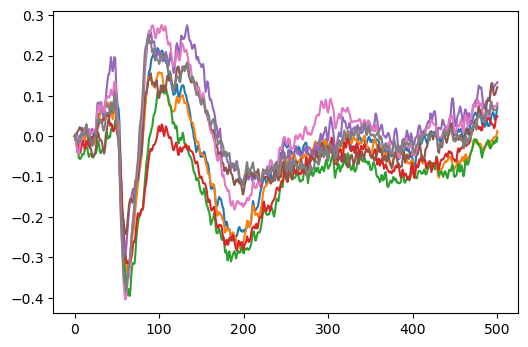

In [42]:
train_set_values = dd.values.reshape(4*6*30,501,8)
train_set_values = np.moveaxis(train_set_values,[0,1,2],[0,2,1])
test_set_values = dr.values.reshape(4*1*30,501,8)
test_set_values = np.moveaxis(test_set_values,[0,1,2],[0,2,1])
print(train_set_values.shape)
plt.figure()
plt.plot(train_set_values.mean(axis=0).T);

In [43]:
feat_train = pd.read_csv('train_data_features.csv').iloc[:,1:]
feat_test = pd.read_csv('test_data_features.csv').iloc[:,1:]

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler()
fts = scaler.fit_transform(feat_train)
param_grid={'n_neighbors':[x for x in range(1,12)]}
knn=KNeighborsClassifier()
grid_search=GridSearchCV(knn,param_grid,cv=5,scoring='accuracy',return_train_score=True)
grid_search.fit(fts ,y_train);
c=grid_search.cv_results_
for mean_score,params in zip(c['mean_test_score'],c['params']):
    print(round(mean_score,5),params)

0.41667 {'n_neighbors': 1}
0.39722 {'n_neighbors': 2}
0.4 {'n_neighbors': 3}
0.40556 {'n_neighbors': 4}
0.41667 {'n_neighbors': 5}
0.41111 {'n_neighbors': 6}
0.4 {'n_neighbors': 7}
0.40139 {'n_neighbors': 8}
0.42222 {'n_neighbors': 9}
0.41667 {'n_neighbors': 10}
0.42361 {'n_neighbors': 11}


In [45]:
clf = KNeighborsClassifier(n_neighbors=12)
clf.fit(scaler.transform(feat_train), y_train)

KNeighborsClassifier(n_neighbors=12)

In [46]:
c_m = confusion_matrix(clf.predict(feat_test.values),y_test)
c_m

array([[ 0,  0,  0,  0],
       [ 3,  5,  2,  3],
       [ 4,  6, 14,  8],
       [23, 19, 14, 19]])

In [47]:
sum(np.diag(c_m))/np.sum(c_m)

0.31666666666666665

In [48]:
y_train_du = y_train[y_train<2]
feat_train_du = feat_train[y_train<2]

In [49]:
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=42)
cl = pd.DataFrame()
cl.loc['LogisticRegression', 'pipeline'] = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000),)
cl.loc['LDA', 'pipeline'] = make_pipeline(StandardScaler(), PCA(2), LDA(),)
cl.loc['KNC', 'pipeline'] = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5),)
cl.loc['GaussianNB', 'pipeline'] = make_pipeline(StandardScaler(), GaussianNB(),)
cl.loc['SVC', 'pipeline'] = make_pipeline(StandardScaler(), SVC(kernel="linear", C=0.1))
cl.loc['SVC', 'pipeline'] = make_pipeline(StandardScaler(), SVC(kernel="rbf", C=1E6))

In [50]:
auc = []
acc = []
methods = []
for pipeline in cl.iterrows():
    res = cross_validate(pipeline[1][0], feat_train_du.values, y=y_train_du, scoring=['accuracy','roc_auc'], cv=cv, n_jobs=-1)
    auc.extend(res['test_roc_auc'])
    acc.extend(res['test_accuracy'])
    methods.extend([pipeline[0]]*len(res['test_roc_auc']))
    
results = pd.DataFrame(data=list(zip(auc,acc)), columns=['AUC','ACC'])
results['Method'] = methods
results.groupby('Method').mean()

,AUC,ACC
Method,,
GaussianNB,0.644049,0.621111
KNC,0.750790,0.670000
LDA,0.546914,0.525556
LogisticRegression,0.805432,0.724444
SVC,0.821432,0.736667


In [51]:
acc = []
methods = []
for pipeline in cl.iterrows():
    res = cross_validate(pipeline[1][0], feat_train.values, y=y_train, scoring=['accuracy'], cv=cv, n_jobs=-1)
    acc.extend(res['test_accuracy'])
    methods.extend([pipeline[0]]*len(res['test_accuracy']))
    
results = pd.DataFrame(data=list(zip(acc)), columns=['ACC'])
results['Method'] = methods
results.groupby('Method').mean()

,ACC
Method,
GaussianNB,0.385000
KNC,0.453333
LDA,0.293889
LogisticRegression,0.523333
SVC,0.550000


In [52]:
train_set_values.shape

(720, 8, 501)

In [53]:
y_train.shape

(720,)

In [54]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(8, 501, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='sigmoid'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 6, 499, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 249, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 247, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 15808)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                1011776   
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
Total params: 1,030,852
Trainable params: 1,030,852
Non-trainable params: 0
____________________________________________

In [55]:
from keras.utils import to_categorical

train_set_values = np.expand_dims(train_set_values.astype('float32'),3)
test_set_values = np.expand_dims(test_set_values.astype('float32'),3)
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [56]:
train_set_values.shape

(720, 8, 501, 1)

In [57]:
train_labels.shape

(720, 4)

In [58]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_set_values, train_labels, epochs=8, batch_size=64)
test_loss, test_acc = model.evaluate(test_set_values, test_labels)
test_acc


Epoch 1/8
12/12 [==============================] - 2s 101ms/step - loss: 0.6105 - accuracy: 0.3011
Epoch 2/8
12/12 [==============================] - 1s 104ms/step - loss: 0.4907 - accuracy: 0.5391
Epoch 3/8
12/12 [==============================] - 1s 90ms/step - loss: 0.4172 - accuracy: 0.6698
Epoch 4/8
12/12 [==============================] - 1s 98ms/step - loss: 0.3635 - accuracy: 0.7174
Epoch 5/8
12/12 [==============================] - 1s 93ms/step - loss: 0.2982 - accuracy: 0.7782
Epoch 6/8
12/12 [==============================] - 1s 102ms/step - loss: 0.2562 - accuracy: 0.8106
Epoch 7/8
12/12 [==============================] - 1s 105ms/step - loss: 0.2156 - accuracy: 0.8728
Epoch 8/8
4/4 [==============================] - 0s 36ms/step - loss: 0.3909 - accuracy: 0.6917


0.6916666626930237

Train set:

![train_set](train_setconfusion_20220530_1644.png)

Test set:
![test_set](test_setconfusion_20220530_1644.png)